# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [ ]:
# TODO

#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [ ]:
# TODO

#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [ ]:
# TODO

#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [ ]:
# TODO

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [ ]:
# TODO

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [ ]:
# TODO

#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [ ]:
# TODO

#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


In [ ]:
# TODO: Code

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [ ]:
# TODO

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [ ]:
# TODO

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

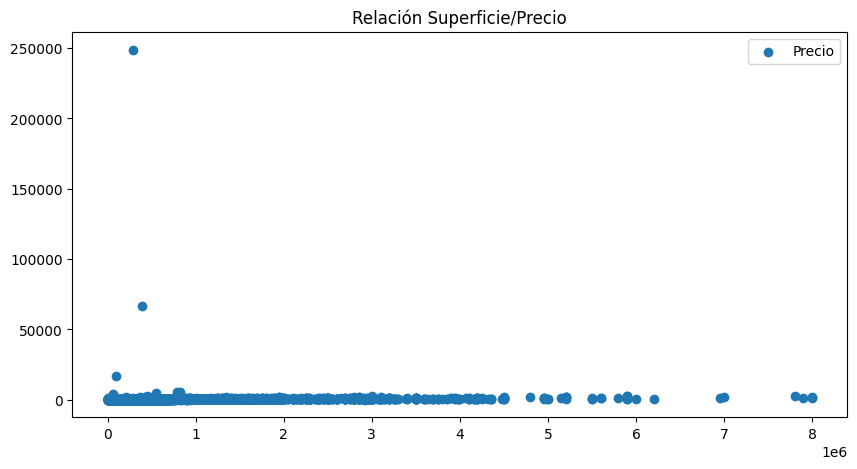

None


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

###Creamos el data frame con a partir del CSV, la separación es ; ###

df_estates = pd.read_csv('assets/real_estate.csv', sep=';')
###Imprimir dirección de la casa más cara y la más barata###

def HighPrice(df):
    #Cogemos el valor más grande de la columna Price (El ultimo en este caso) y lo convertimos en una Serie con squeeze para trabajarlo mejor.
    df_estates_highprice = df.sort_values('price').tail(1).squeeze()
    return f"La casa con dirección en Calle {df_estates_highprice['level7']} es la más cara y su precio es de {df_estates_highprice['price']} €."

def LowPrice(df):
    df_estates_lowprice = df.sort_values('price').head(1).squeeze()
    return f"La casa con dirección en Calle {df_estates_lowprice['level7']} es la más barata y su precio es de {df_estates_lowprice['price']} €."
###Imprimimos la casa más grande y la más pequeña###

def MoreSurface(df):
    df_estates_moresurface = df.sort_values('surface').tail(1).squeeze()
    return f"La casa más grande está en la Calle {df_estates_moresurface['level7']} y su superficie es de {df_estates_moresurface['surface']} metros."

def LessSurface(df):
    df_estates_lesssufrface = df.sort_values('surface').head(1).squeeze()
    return f"La casa más pequeña está en la Calle {df_estates_lesssufrface['level7']} y su superficie es de {df_estates_lesssufrface['surface']} metros."

###Nombre de las poblaciones###

def Populations(df):
    populations = df.level5.squeeze()
    list_population = []
    for i in range(len(populations)):
       list_population.append(populations[i])
    return list_population

### Comprobar si hay valores no admitidos en la lista ###

def NanIdentificy(df):
    cols_nan = df.columns[df.isnull().any()] #Localizamos las columnas con valores NaN
    rows_nan = df[df.isnull().any(axis = 1)][cols_nan] #Localizamos las filas con valores NaN
    return rows_nan.isnull().any() #Solo devolvemos las columnas con valor NaN = True

### Eliminar los NAs del dataset###

def Filter(df):
   df_filter = df.dropna(axis = 1) #Eliminanos solo las columnas porque si eliminamos las filas se borraría todo el DataSet
   return df_filter

###Media de precios de Arroyomolinos###

def MeanArroyomolinos(df):
    arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]
    return arroyomolinos.price.mean()

###Historiograma de los precios de Arroyomolinos###

def HistogramPriceArroyomolinos(df):
    arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]
    plt.figure (figsize=(10,5))
    plt.hist (arroyomolinos.price, bins=30, alpha=1)
    plt.title ("Precios de Arroyomolinos (Madrid)")
    plt.show()
    return None

###Comprobar si el precio promedio de Valdemorillo y de Galapagar son el mismo###

def IsValdemorilloAndGalapagarMeanEqual(df):
    valdemorillo = df[df['level5'] == "Valdemorillo"]
    galapagar = df[df['level5'] == "Galapagar"]
    print (f"El precio medio de Valdemorillo es de {valdemorillo.price.mean()}.\nEl precio medio de Galapagar es de {galapagar.price.mean()}.")
    if valdemorillo.price.mean() == galapagar.price.mean():
        print ("El precio medio de Valdemorillo y Galapagar es igual.")
    elif valdemorillo.price.mean() > galapagar.price.mean():
        print ("El precio medio de Valdemorillo es superior al de Galapagar")
    else:
        print ("El precio medio de Galapagar es superior al de Valdemorillo")
    return None

###Comprobar si el precio/m2 promedio de Valdemorillo y Galapagar son el mismo###

def IsValdemorilloAndGalapagarMeanPPSEqual(df):
    pps = df.price / df.surface
    df['pps'] = pps
    ppsValdemorillo = df[df['level5'] == "Valdemorillo"]
    ppsGalapagar = df[df['level5'] == "Galapagar"]
    print (f"El precio medio de Valdemorillo por metro cuadrado es de {ppsValdemorillo.pps.mean()}.\nEl precio medio de Galapagar por metro cuadrado es de {ppsGalapagar.pps.mean()}.")
    if ppsValdemorillo.pps.mean() == ppsGalapagar.pps.mean():
        print ("El precio medio por metro cuadrado de Valdemorillo y Galapagar es el mismo.")
    elif ppsValdemorillo.pps.mean() > ppsGalapagar.pps.mean():
        print ("El precio medio por metro cuadrado de Valdemorillo es superior al de Galapagar.")
    else:
        print ("El precio medio por metro cuadrado de Galapagar es superior al de Valdemorillo.")
    return None
  
  ###Analizamos la relación entre el precio y la superficie de las casas.###

def RelPriceSurface(df):
    plt.figure(figsize=(10,5))
    plt.scatter(df.price, df.surface, label = "Precio")

    plt.title("Relación Superficie/Precio")
    plt.legend()
    plt.show()
    return None

#########Ejercicios########

#Ejercicio1
#print (HighPrice(df_estates))

#Ejercicio2
#print (LowPrice(df_estates))

#Ejercicio3.1
#print (MoreSurface(df_estates))

#Ejercicio3.2
#print (LessSurface(df_estates))

#Ejercicio4
#print (Populations(df_estates))

#Ejercicio5
#print (NanIdentificy(df_estates))

#Ejercicio6
#print(Filter(df_estates))
#print (df_estates)

#Ejercicio7
#print(MeanArroyomolinos(df_estates))

#Ejercicio8
#print(HistogramPriceArroyomolinos(df_estates))

#Ejercicio9
#print (IsValdemorilloAndGalapagarMeanEqual(df_estates))

#Ejercicio10
#print (IsValdemorilloAndGalapagarMeanPPSEqual(df_estates))

#Ejercicio11
print (RelPriceSurface(df_estates))

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [ ]:
# TODO

#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [ ]:
# TODO

#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [ ]:
# TODO

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (907,) and arg 1 with shape (4,).

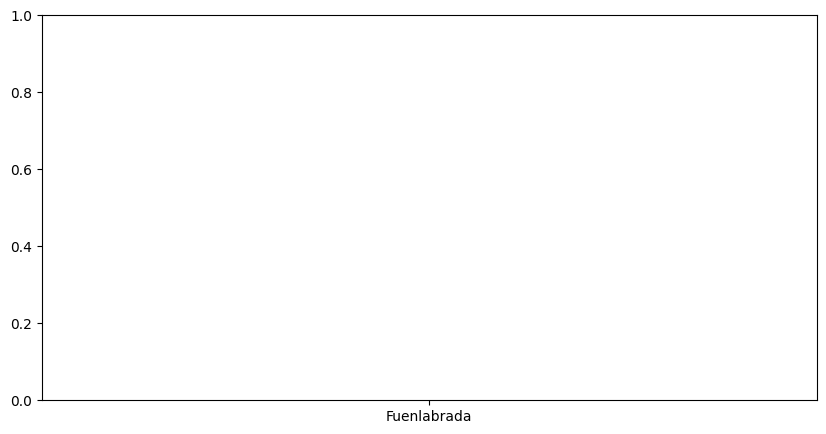

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

###Creamos el data frame con a partir del CSV, la separación es ; ###

df_estates = pd.read_csv('assets/real_estate.csv', sep=';')
###Imprimir dirección de la casa más cara y la más barata###

def HighPrice(df):
    #Cogemos el valor más grande de la columna Price (El ultimo en este caso) y lo convertimos en una Serie con squeeze para trabajarlo mejor.
    df_estates_highprice = df.sort_values('price').tail(1).squeeze()
    return f"La casa con dirección en Calle {df_estates_highprice['level7']} es la más cara y su precio es de {df_estates_highprice['price']} €."

def LowPrice(df):
    df_estates_lowprice = df.sort_values('price').head(1).squeeze()
    return f"La casa con dirección en Calle {df_estates_lowprice['level7']} es la más barata y su precio es de {df_estates_lowprice['price']} €."
###Imprimimos la casa más grande y la más pequeña###

def MoreSurface(df):
    df_estates_moresurface = df.sort_values('surface').tail(1).squeeze()
    return f"La casa más grande está en la Calle {df_estates_moresurface['level7']} y su superficie es de {df_estates_moresurface['surface']} metros."

def LessSurface(df):
    df_estates_lesssufrface = df.sort_values('surface').head(1).squeeze()
    return f"La casa más pequeña está en la Calle {df_estates_lesssufrface['level7']} y su superficie es de {df_estates_lesssufrface['surface']} metros."

###Nombre de las poblaciones###

def Populations(df):
    populations = df.level5.squeeze()
    list_population = []
    for i in range(len(populations)):
       list_population.append(populations[i])
    return list_population

### Comprobar si hay valores no admitidos en la lista ###

def NanIdentificy(df):
    cols_nan = df.columns[df.isnull().any()] #Localizamos las columnas con valores NaN
    rows_nan = df[df.isnull().any(axis = 1)][cols_nan] #Localizamos las filas con valores NaN
    return rows_nan.isnull().any() #Solo devolvemos las columnas con valor NaN = True

### Eliminar los NAs del dataset###

def Filter(df):
   df_filter = df.dropna(axis = 1) #Eliminanos solo las columnas porque si eliminamos las filas se borraría todo el DataSet
   return df_filter

###Media de precios de Arroyomolinos###

def MeanArroyomolinos(df):
    arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]
    return arroyomolinos.price.mean()

###Historiograma de los precios de Arroyomolinos###

def HistogramPriceArroyomolinos(df):
    arroyomolinos = df[df['level5'] == "Arroyomolinos (Madrid)"]
    plt.figure (figsize=(10,5))
    plt.hist (arroyomolinos.price, bins=30, alpha=1)
    plt.title ("Precios de Arroyomolinos (Madrid)")
    plt.show()
    return None

###Comprobar si el precio promedio de Valdemorillo y de Galapagar son el mismo###

def IsValdemorilloAndGalapagarMeanEqual(df):
    valdemorillo = df[df['level5'] == "Valdemorillo"]
    galapagar = df[df['level5'] == "Galapagar"]
    print (f"El precio medio de Valdemorillo es de {valdemorillo.price.mean()}.\nEl precio medio de Galapagar es de {galapagar.price.mean()}.")
    if valdemorillo.price.mean() == galapagar.price.mean():
        print ("El precio medio de Valdemorillo y Galapagar es igual.")
    elif valdemorillo.price.mean() > galapagar.price.mean():
        print ("El precio medio de Valdemorillo es superior al de Galapagar")
    else:
        print ("El precio medio de Galapagar es superior al de Valdemorillo")
    return None

###Comprobar si el precio/m2 promedio de Valdemorillo y Galapagar son el mismo###

def IsValdemorilloAndGalapagarMeanPPSEqual(df):
    pps = df.price / df.surface
    df['pps'] = pps
    ppsValdemorillo = df[df['level5'] == "Valdemorillo"]
    ppsGalapagar = df[df['level5'] == "Galapagar"]
    print (f"El precio medio de Valdemorillo por metro cuadrado es de {ppsValdemorillo.pps.mean()}.\nEl precio medio de Galapagar por metro cuadrado es de {ppsGalapagar.pps.mean()}.")
    if ppsValdemorillo.pps.mean() == ppsGalapagar.pps.mean():
        print ("El precio medio por metro cuadrado de Valdemorillo y Galapagar es el mismo.")
    elif ppsValdemorillo.pps.mean() > ppsGalapagar.pps.mean():
        print ("El precio medio por metro cuadrado de Valdemorillo es superior al de Galapagar.")
    else:
        print ("El precio medio por metro cuadrado de Galapagar es superior al de Valdemorillo.")
    return None
  
###Analizamos la relación entre el precio y la superficie de las casas.###

def RelPriceSurface(df): #SIN ACABAR
    plt.figure(figsize=(10,5))
    plt.scatter(df.price, df.surface, label = "Precio")

    plt.title("Relación Superficie/Precio")
    plt.legend()
    plt.show()
    return None

###Buscamos cuantas agencias contiene el DataSet###
def HowManyRealEstatesAre(df):
    return len(df.id_realEstates.value_counts()) #Juntamos todas las ID de las Inmobiliarias y devolvemos la longitud.

###Buscamos la población con más cantidad de casas###

def HowCityHaveMoreHouses(df):
    return df.level5.value_counts().head(1)

###Creamos un nuevo DataFrame que contenga Fuenlabrada, Leganes, Getafe y Alcorcón"###

def CinturonSur(df):
    filt_cinturonSur =df['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])
    cinturonsur = df[filt_cinturonSur]
    return cinturonsur

###Grafico de barra de la mediana de los precios de Cinturon Sur###

def CinturonSurMeanPrice(df):
    labels = ["Fuenlabrada","Alcorcón","Leganés","Getafe"]
    fuenlabrada = df[df['level5'] == "Fuenlabrada"].price.mean()
    alcorcon = df[df['level5'] == "Alcorcón"].price.mean()
    leganes = df[df['level5'] == "Leganés"].price.mean()
    getafe = df[df['level5'] == "Getafe"].price.mean()
    values = (fuenlabrada, alcorcon, leganes, getafe)
    plt.figure(figsize=(10,5))
    plt.bar(labels, values)

    plt.title("Precios Medios Cinturón Sur")
    plt.show()

    return None


#########Ejercicios########

#Ejercicio1
#print (HighPrice(df_estates))

#Ejercicio2
#print (LowPrice(df_estates))

#Ejercicio3.1
#print (MoreSurface(df_estates))

#Ejercicio3.2
#print (LessSurface(df_estates))

#Ejercicio4
#print (Populations(df_estates))

#Ejercicio5
#print (NanIdentificy(df_estates))

#Ejercicio6
#print(Filter(df_estates))
#print (df_estates)

#Ejercicio7
#print(MeanArroyomolinos(df_estates))

#Ejercicio8
#print(HistogramPriceArroyomolinos(df_estates))

#Ejercicio9
#print (IsValdemorilloAndGalapagarMeanEqual(df_estates))

#Ejercicio10
#print (IsValdemorilloAndGalapagarMeanPPSEqual(df_estates))

#Ejercicio11
#print (RelPriceSurface(df_estates))

#Ejercicio12
#print (HowManyRealEstatesAre(df_estates))

#Ejercicio13
#print(HowCityHaveMoreHouses(df_estates))

#Ejercicio14
CinturonSur(df_estates)

#Ejercicio15
print(CinturonSurMeanPrice(CinturonSur(df_estates)))


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [ ]:
# TODO

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [ ]:
# TODO

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [ ]:
# TODO

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [ ]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [ ]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
